In [4]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
from bs4 import BeautifulSoup

In [5]:
import re

In [2]:
page = requests.get('https://www.cars.com/')
soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
car_types = []
for types in soup.find_all(class_='_1CKe8'):
    car_types.append(types.find('a')['href'])

cars = []

for car in car_types:
    page1 = requests.get('https://www.cars.com{}?rpp=200'.format(car))
    soup1 = BeautifulSoup(page1.content, 'html.parser')
    for x in soup1.find_all(class_='card-details'):
        cars.append(x.find('a')['href'])

In [4]:
get_specs = []
for wheels in cars:
    page2 = requests.get('https://www.cars.com{}trims/'.format(wheels))
    soup2 = BeautifulSoup(page2.content, 'html.parser')
    for x in soup2.find_all(class_='cell cell-border-bottom'):
        get_specs.append(x.find('a')['href'])

In [ ]:
specs = []

In [19]:

for sp in get_specs[2579:]:
    trim = {}
    page3 = requests.get('https://www.cars.com{}'.format(sp))
    soup3 = BeautifulSoup(page3.content, 'html.parser')
    if len(soup3.find_all(class_='specs-price__value')) > 0:    
        trim['price'] = soup3.find_all(class_='specs-price__value')[0].text
    else:
        pass
    for z in soup3.find_all(class_='specs-header__breadcrumb'):
        trim['manufacturer'] = z.find_all('a')[1].text
        trim['model'] = z.find_all('a')[2].text
    for x in soup3.find_all(class_='overview-value'):
        trim[x['id']] = x.text
    tech = []
    for v in soup3.find_all(class_='specs-accordion-description'):
        tech.append(v.text)
    techs = []
    for y in soup3.find_all(class_='data'):
        techs.append(y.text)
    for j, k in zip (tech, techs):
        trim[j] = k
    specs.append(trim)

In [21]:
len(get_specs)

5292

In [35]:
len(specs[900].keys())

425

In [752]:
df = pd.DataFrame.from_records(specs)

In [282]:
re.match('\d', df.columns.tolist()[1])

<re.Match object; span=(0, 1), match='1'>

In [754]:
df = df.drop(df[df['price'].isna()].index)

In [753]:
df = df.drop(columns = list(filter(lambda s: re.match('\d',s), df.columns.tolist())))

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5291
Columns: 3574 entries, # of valves to warranty
dtypes: object(3574)
memory usage: 143.1+ MB


In [755]:
df = df.dropna(axis=1, thresh=500)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5291
Columns: 624 entries, # of valves to warranty
dtypes: float64(453), int64(9), object(162)
memory usage: 25.0+ MB


In [ ]:
df.columns[df.isna().any()].tolist()

In [350]:
df = df.drop(columns=['Air conditioning', 'Aluminum instrument panel insert, door panel insert, console insert'])

'$27,400'

In [751]:
for money in specs:
    for mula in df:
        money = money['price'].replace(",", "")[1:7]
        mula = money

TypeError: string indices must be integers

In [394]:
for ix in df['price']:
    price = ix.replace(",", "")
    price2 = price.replace("$", "")
    print(price2)
    ix = price2


24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
2429

24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
2429

24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
2429

24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
24295
2429

In [761]:
df = df.fillna(value=0)

In [772]:
for ix in df.price:
    ix = ix.replace(",", "")
    ix = ix.replace("$", "")
    print(ix)

24295
24295
24295
24295
24295
24295
24295
24295
24295
33300
33300
33300
33300
27770
27770
27770
27770
27770
27770
27770
27770
27770
173000
19600
19600
19600
19600
19600
19600
19600
54000
54000
54000
42100
42100
42100
42100
42100
21250
21250
21250
21250
21250
21250
21250
21250
21250
21250
97250
97250
97250
97250
97250
97250
97250
35180
35180
35180
35180
35180
35180
35180
35180
35180
35180
35180
35180
183500
183500
183500
56550
56550
56550
56550
56550
56550
56550
56550
102700
102700
21990
21990
21990
21990
21990
21990
21990
22095
22095
22095
22095
22095
55950
55950
55950
55950
55950
55950
27495
27495
27495
38650
38650
37450
37450
37450
37450
37450
25000
25000
25000
25000
33000
33000
33000
33000
33000
33000
33000
33000
33000
33000
33000
33000
33000
33000
28645
28645
28645
28645
22745
22745
22745
22745
22745
22745
36995
36995
36995
102650
86450
86450
28250
28250
28250
14730
14730
14730
99950
140250
140250
26990
26990
26990
26990
26990
39900
39900
39900
39900
23100
25100
25100
25100
25100
2

41400
30450
30450
30450
30450
30450
30450
30450
30450
30450
30450
30450
30450
30450
30450
41500
41500
41500
41500
41500
41500
45450
45450
45450
45450
45450
45450
48150
48150
48150
48150
48150
48150
48150
48150
38900
38900
38900
38900
38900
38900
48750
48750
48750
48750
48750
48750
48750
48750
48750
48750
48750
48750
48750
85900
85900
85900
85900
26545
26545
26545
26545
26545
26545
26545
26545
26545
25345
25345
25345
25345
25345
25345
25345
32195
32195
32195
32195
32195
32195
32195
32195
32195
32195
32195
25625
25625
25625
25625
25625
25625
25625
26290
26290
26290
26290
26290
26290
26290
26290
26290
26290
26290
26290
26290
26290
26290
28100
28100
28100
28100
28100
28100
200000
59700
59700
59700
42600
42600
42600
42600
95950
95950
95950
95950
95950
95950
95950
95950
95950
95950
95950
62600
62600
62600
62600
62600
62600
62600
62600
97500
97500
97500
97500
97500
97500
97500
97500
97500
97500
97500
97500
56200
56200
56200
56200
56200
56200
56200
56200
56200
37885
37885
37885
37885
38835
452

53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53000
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
53400
40395
40395
40395
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
38790
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
48625
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
52740
40800
40800
40800
40800
40800
40800
40800
40800
40800
40800
40800
40800
40800
40800
40800
40800
4080

In [774]:
df.price.apply(lambda x:x.split('-')[0] if '-' in x else x)
for i in range(dfmodel.shape[0]):
    df['price'].iloc[i] = df['price'].iloc[i].replace(",", "")
    df['price'].iloc[i] = df['price'].iloc[i].replace("$", "")

In [780]:
df.price = df.price.apply(lambda x:x.replace(",", ""))
df.price = df.price.apply(lambda x:x.replace("$", ""))


In [782]:
df.price

0        24295
1        24295
2        24295
3        24295
4        24295
5        24295
6        24295
7        24295
8        24295
9        33300
10       33300
11       33300
12       33300
13       27770
14       27770
15       27770
16       27770
17       27770
18       27770
19       27770
20       27770
21       27770
22      173000
23       19600
24       19600
25       19600
26       19600
27       19600
28       19600
29       19600
         ...  
5262     40250
5263     40250
5264     40250
5265     40250
5266     45400
5267     51250
5268     52950
5269     52950
5270     52950
5271     52950
5272     44600
5273     44600
5274     60000
5275     60000
5276     60000
5277     60000
5278     51000
5279     51000
5280     53400
5281     53400
5282     53400
5283     53400
5284     58950
5285     58950
5286     62750
5287     81500
5288     81500
5289     70300
5290     93100
5291     93100
Name: price, Length: 5245, dtype: object


In [783]:
df.price = df.price.apply(lambda x:x.split('-')[0] if '-' in x else x)

In [784]:
df.price = df.price.apply(lambda x: int(x))

In [785]:
dfmodel = pd.DataFrame(df.groupby(['manufacturer', 'model']).mean())

In [789]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Columns: 473 entries, manufacturer to domestic
dtypes: float64(469), int64(1), object(3)
memory usage: 1.6+ MB


In [787]:
dfmodel = dfmodel.reset_index()

In [790]:
dfmodel[dfmodel['domestic'] == 1]

,manufacturer,model,A/V remote,ABS,ABS and driveline traction control,AM/FM radio,AM/FM stereo with seek-scan,Adjustable front head restraints,Adjustable front head restraints with tilt,Air conditioning,...,Voltmeter,Water temp. gauge,Water-temp. warning,Wheel locks,Wheel well moldings,Window grid antenna,Wireless phone connectivity,price,origin,domestic
99,Buick,Enclave,0.857143,2.0,2.000000,2.0,0.285714,2.000000,0.000000,2.0,...,2.000000,2.0,2.0,1.000000,0.000000,0.000000,2.0,56000.000000,US,1
100,Buick,Encore,0.000000,2.0,2.000000,2.0,0.000000,2.000000,0.000000,2.0,...,0.000000,2.0,2.0,0.857143,2.000000,0.000000,2.0,23200.000000,US,1
101,Buick,Encore GX,0.000000,2.0,2.000000,2.0,0.000000,2.000000,0.000000,2.0,...,0.000000,2.0,2.0,1.000000,2.000000,0.000000,2.0,30500.000000,US,1
102,Buick,Envision,0.000000,2.0,2.000000,2.0,0.000000,2.000000,2.000000,2.0,...,0.000000,2.0,2.0,0.857143,0.000000,0.000000,2.0,31995.000000,US,1
103,Buick,Regal Sportback,0.000000,2.0,2.000000,2.0,0.666667,1.666667,0.000000,2.0,...,1.000000,2.0,2.0,0.833333,0.000000,0.000000,2.0,35770.000000,US,1
104,Buick,Regal TourX,0.000000,2.0,2.000000,2.0,1.333333,2.000000,0.000000,2.0,...,0.666667,2.0,2.0,0.666667,2.000000,0.000000,2.0,29370.000000,US,1
105,Cadillac,ATS-V,0.000000,2.0,2.000000,2.0,0.000000,2.000000,2.000000,2.0,...,2.000000,2.0,2.0,1.000000,0.000000,2.000000,2.0,50406.666667,US,1
106,Cadillac,CT4,0.000000,2.0,2.000000,2.0,0.000000,2.000000,0.000000,2.0,...,2.000000,2.0,2.0,0.000000,0.000000,2.000000,2.0,32995.000000,US,1
107,Cadillac,CT5,0.000000,2.0,2.000000,2.0,0.000000,2.000000,0.000000,2.0,...,2.000000,2.0,2.0,1.000000,0.000000,2.000000,2.0,36895.000000,US,1
108,Cadillac,CT6,1.333333,2.0,2.000000,2.0,0.000000,2.000000,2.000000,2.0,...,2.000000,2.0,2.0,1.666667,0.000000,2.000000,2.0,58995.000000,US,1


In [582]:
dfmodel.to_csv('cars.com', index=False)

In [556]:
Asia = ['Acura', 'Toyota', 'Hyundai', 'Honda', 'Nissan', 'Kia', 'Subaru', 'Genesis', 'Lexus', 'Mazda', 'INFINITI', 'Mitsubishi']
Europe = ['Alfa Romeo', 'Aston Martin', ' Audi', 'FIAT', 'Mercedes-Benz', 'BMW', ' MINI', 'Volkswagen', 'Porsche', 'Volvo', 'smart', 'Jaguar', 'Lotus', 'Audi', 'Ferrari', 'Bentley', 'Maserati', 'Lamborghini', 'McLaren', 'Land Rover']
America = ['Chevrolet', 'Ford', 'Cadillac', 'Lincoln', 'Dodge', 'Jeep', 'GMC', 'Buick', 'Chrysler', 'RAM', 'Tesla']

In [757]:
dfmodel.shape[0]

454

In [758]:
dfmodel 

,manufacturer,model,A/V remote,ABS,ABS and driveline traction control,Air filter,Alloy wheels,Alternator,Aluminum cylinder block,Aluminum cylinder head,...,Voice activated radio,Voltmeter,Water temp. gauge,Water-temp. warning,Wheel locks,Wheel well moldings,Window grid antenna,Wireless phone connectivity,origin,domestic
0,Acura,ILX,0.0,10,10.0,10.0,10.0,0.0,10.0,10.0,...,8.0,0.0,10.0,10.0,0.0,0.0,10.0,10.0,AS,0
1,Acura,MDX,28.0,98,98.0,98.0,98.0,0.0,98.0,98.0,...,98.0,0.0,98.0,98.0,49.0,0.0,98.0,98.0,AS,0
2,Acura,MDX Sport Hybrid,0.0,32,32.0,32.0,32.0,0.0,32.0,32.0,...,32.0,0.0,32.0,32.0,14.0,0.0,32.0,32.0,AS,0
3,Acura,NSX,0.0,18,18.0,18.0,18.0,10.0,18.0,18.0,...,18.0,0.0,18.0,18.0,4.0,0.0,18.0,18.0,AS,0
4,Acura,RDX,0.0,80,80.0,80.0,80.0,0.0,80.0,80.0,...,80.0,0.0,80.0,0.0,40.0,0.0,0.0,80.0,AS,0
5,Acura,RLX,0.0,6,6.0,6.0,6.0,0.0,6.0,6.0,...,6.0,0.0,6.0,6.0,3.0,0.0,6.0,6.0,AS,0
6,Acura,RLX Sport Hybrid,0.0,14,14.0,14.0,14.0,12.0,14.0,14.0,...,14.0,0.0,14.0,14.0,6.0,0.0,14.0,14.0,AS,0
7,Acura,TLX,0.0,78,78.0,78.0,78.0,0.0,78.0,78.0,...,78.0,0.0,78.0,78.0,37.0,0.0,78.0,78.0,AS,0
8,Alfa Romeo,4C,0.0,4,4.0,4.0,4.0,0.0,4.0,4.0,...,4.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,EU,0
9,Alfa Romeo,4C Spider,0.0,8,8.0,8.0,8.0,0.0,8.0,8.0,...,8.0,0.0,8.0,8.0,4.0,0.0,0.0,8.0,EU,0


In [788]:
dfmodel['origin'] = ''
dfmodel['domestic'] = ''

for i in range(dfmodel.shape[0]):
    if dfmodel['manufacturer'].iloc[i] in Asia :
        dfmodel['origin'].iloc[i] = 'AS'
        dfmodel['domestic'].iloc[i] = 0
    elif dfmodel['manufacturer'].iloc[i] in Europe:
        dfmodel['origin'].iloc[i] = 'EU'
        dfmodel['domestic'].iloc[i] = 0
    else:
        dfmodel['origin'].iloc[i] = 'US'
        dfmodel['domestic'].iloc[i] = 1

In [1041]:
dfmodel.columns.to_list()

['manufacturer',
 'model',
 'A/V remote',
 'ABS',
 'ABS and driveline traction control',
 'AM/FM radio',
 'AM/FM stereo with seek-scan',
 'Adjustable front head restraints',
 'Adjustable front head restraints with tilt',
 'Air conditioning',
 'Air filter',
 'Alloy wheels',
 'Alternator',
 'Aluminum cylinder block',
 'Aluminum cylinder head',
 'Aluminum instrument panel insert, door panel insert, console insert',
 'Aluminum spare wheel',
 'Ambient lighting',
 'Amplifier',
 'Analog clock',
 'Analog display',
 'Anti-whiplash front head restraints',
 'Ashtray',
 'Auto dimming left side-view door mirror',
 'Auto dimming power remote heated power folding side-view door mirrors with tilt down, turn signal indicator',
 'Auto tilt-away steering wheel',
 'Auto-dimming door mirrors',
 'Auto-dimming rearview mirror',
 'Auto-leveling headlights',
 'Auto-locking doors',
 'Automatic air conditioning',
 'Automatic dual-zone front air conditioning',
 'Automatic equalizer',
 'Automatic full-time all-whe

In [858]:
dfmodel = dfmodel.drop(columns = ['AM/FM stereo with seek-scan',
 'Adjustable front head restraints',
 'Adjustable front head restraints with tilt'])


In [ ]:
cursor.execute("CREATE DATABASE CARS DEFAULT CHARACTER SET 'utf8'")
cursor.close()
cnx.close()

In [ ]:
TABLES["Cars"] = ("""
      CREATE TABLE Cars (
      ID int(5) NOT NULL UNIQUE AUTO_INCREMENT,
      Price varchar(50) NOT NULL,
      Manufacturer varchar(8) NOT NULL,
      Model varchar(8) NOT NULL,
      date int(6) NOT NULL,
      GENRE1 varchar(15) NOT NULL,
      GENRE2 varchar(15) NOT NULL,
      score float(3) NOT NULL,
      user_votes int(8) NOT NULL,
      PRIMARY KEY (ID)
      )
""")

In [708]:
df1.manufacturer.unique()

array(['ACURA', 'ALFA ROMEO', 'ALPINE', 'ARIEL', 'ARO', 'ASTON MARTIN',
       'AUDI', 'BENTLEY', 'BMW', 'BRISTOL', 'BUFORI', 'BUGATTI', 'BUICK',
       'CADILLAC', 'CATERHAM', 'CHEVROLET', 'CHRYSLER', 'CITROEN',
       'DACIA', 'DAEWOO', 'DAIHATSU', 'DATSUN', 'DeLorean', 'DODGE',
       'DONKERVOORT', 'DR MOTOR', 'DS AUTOMOBILES', 'FERRARI', 'FIAT',
       'FISKER', 'FORD', 'FSO', 'GEELY', 'GENESIS', 'GMC', 'GTA Motor',
       'HINDUSTAN', 'HOLDEN', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI',
       'ISUZU', 'JAGUAR', 'JEEP', 'Karma', 'KIA', 'KOENIGSEGG', 'KTM',
       'LADA', 'LAMBORGHINI', 'LANCIA', 'LAND ROVER', 'LEXUS', 'LINCOLN',
       'LOTUS', 'Mahindra', 'MARUSSIA', 'MARUTI SUZUKI', 'MASERATI',
       'MAYBACH', 'MAZDA', 'MCLAREN', 'MERCEDES BENZ', 'Mercedes-AMG',
       'MERCURY', 'MG', 'MINI', 'MITSUBISHI', 'MORGAN', 'NISSAN',
       'OLDSMOBILE', 'OPEL', 'PAGANI', 'PANOZ', 'PERODUA', 'PEUGEOT',
       'Pininfarina', 'Polestar', 'PONTIAC', 'PORSCHE', 'PROTON', 'QOROS',
       

In [723]:
eur.append(['ALPINE', 'ARO', 'BRISTOL', 'SEAT', 'SKODA', 'SPYKER' 'BUGATTI', 'TVR', 'VAUXHALL', 'VOLKSWAGEN', 'WIESMANN', 'ZENDER', 'Zenvo', 'CATERHAM', 'Pininfarina', 'SANTANA', 'ROLLS-ROYCE', 'SAAB', 'Polestar''MG', 'MORGAN', 'PEUGEOT', 'CITROEN', 'DACIA','OPEL', 'PAGANI', 'DONKERVOORT', 'DR MOTOR', 'KTM', 'LADA', 'LANCIA', 'Mercedes-AMG', 'MERCEDES BENZ' 'MASERATI', 'MAYBACH' 'LOTUS', 'KOENIGSEGG', 'DS AUTOMOBILES', 'FIAT', 'FSO', 'GTA Motor', 'JAGUAR'])
usa.append(['ARIEL', 'DeLorean', 'FISKER', 'HOLDEN', 'HUMMER', 'TESLA MOTORS', 'Karma', 'MERCURY', 'SALEEN', 'SATURN', 'OLDSMOBILE', 'RAM Trucks', 'PANOZ', 'PONTIAC'])
ash.append(['BUFORI', 'DAEWOO', 'DAIHATSU', 'SSANGYONG', 'SUZUKI', 'TATA MOTORS' 'SCION', 'DATSUN', 'GEELY', 'SAMSUNG', 'HINDUSTAN', 'PROTON', 'QOROS', 'ISUZU', 'Mahindra', 'PERODUA', 'MARUSSIA', 'MARUTI SUZUKI', 'MAZDA'])

In [1015]:
df1['origin'] = ''
df1['domestic'] = ''

for i in range(df1.shape[0]):
    if df1['manufacturer'].iloc[i] in ash:
        df1['origin'].iloc[i] = 'AS'
        df1['domestic'].iloc[i] = 0
    elif df1['manufacturer'].iloc[i] in eur:
        df1['origin'].iloc[i] = 'EU'
        df1['domestic'].iloc[i] = 0
    else:
        df1['origin'].iloc[i] = 'US'
        df1['domestic'].iloc[i] = 1

In [1014]:
df1


,Acceleration 0-62 Mph (0-100 kph),CO2 Emissions,Cargo Volume,City,Combined,Cylinders,Displacement,Drive Type,Front,Front/rear Track,...,Tire Size,Top Speed,Torque,Unladen Weight,Wheelbase,Width,manufacturer,model,year,mpg
0,6.4,NaN,12.3,24 mpg US OR 9.8 L/100Km,28,L4,2354,Front Wheel Drive,Ventilated Discs,"59.4/60.2 in OR 1,509/1,529 mm",...,P215/45 R17,138,180 lb-ft @ 3800 RPM244 Nm @ 3800 RPMFuel Syst...,3093 lbs OR 1403 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2018 - Present,2018,28 mpg US OR 8.4 L/100Km
1,6.4,NaN,12.3,25 mpg US OR 9.4 L/100Km,29,L4,2354,Front Wheel Drive,Ventilated Discs,"59.4/60.2 in OR 1,509/1,529 mm",...,P215/45 R17,138,180 lb-ft @ 3800 RPM244 Nm @ 3800 RPMFuel Syst...,3093 lbs OR 1403 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2016 - 2018,2016,29 mpg US OR 8.1 L/100Km
2,6.4,NaN,12.3,22 mpg US OR 10.7 L/100Km,25,L4,2354,Front Wheel Drive,Ventilated discs,"59.4/60.3 in OR 1,509/1,532 mm",...,P215/45 R17,138,170 lb-ft @ 4400 RPM230 Nm @ 4400 RPMFuel Syst...,2954 lbs OR 1340 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2014 - 2016,2014,NaN
3,6.4,ULEV-2 / AT-PZEV,9.99,39 mpg US OR 6 L/100Km,38,4 inline,1496,Front Wheel Drive,Ventilated Discs,"59.4/60.3 in OR 1,509/1,532 mm",...,205/55R16,138,127 lb-ft @ 1000- 3500 RPM172 Nm @ 1000- 3500 ...,2959 lbs OR 1342 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2012 - Present,2012,NaN
4,6.4,NaN,9.99,NaN,NaN,L4,1998,All Wheel Drive,Ventilated Discs,"59.4/60.3 in OR 1,509/1,532 mm",...,205/55R16,138,280 lb-ft @ 1500-4000 RPM380 Nm @ 1500-4000 RP...,2959 lbs OR 1342 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA RDX 2018 - Present,2018,NaN
5,6.4,NaN,26.1,19 mpg US OR 12.4 L/100Km,22,V6,3471,All Wheel Drive,Ventilated Discs,"63.1/63.4 in OR 1,603/1,610 mm",...,P 235/60 R 18,138,252 lb-ft @ 4900 RPM342 Nm @ 4900 RPMFuel Syst...,3902 lbs OR 1770 kg,105.7 in OR 2685 mm,73.7,ACURA,ACURA RDX 2015 - 2018,2015,NaN
6,6.4,LEV2-ULEV,26.1,20 mpg US OR 11.8 L/100Km,23,V6,3500,Front Wheel Drive,Ventilated Discs,"63.1/63.4 in OR 1,603/1,610 mm",...,235/60 R18,138,251 lb-ft @ 5000 RPM340 Nm @ 5000 RPMFuel Syst...,3717 lbs OR 1686 kg,105.7 in OR 2685 mm,73.7,ACURA,ACURA RDX 2012 - 2015,2012,NaN
7,9,294 g/km / LEV2 - ULEV,27.8,19 mpg US OR 12.4 L/100Km,20,L4,2300,Front Wheel Drive,Ventilated Discs,"61.9/62.6 in OR 1,572/1,590 mm",...,235/55 R18,121,260 lb-ft @ 4500 RPM353 Nm @ 4500 RPMFuel Syst...,3743 lbs OR 1698 kg,104.3 in OR 2649 mm,73.6,ACURA,ACURA RDX 2006 - 2011,2006,NaN
8,9,NaN,14.9,29 mpg US OR 8.1 L/100Km,29,V6,3471,All Wheel Drive,Ventilated Discs,"64.3/64.2 in OR 1,633/1,631 mm",...,245/40 R19,121,272 lb-ft @ 4500 RPM369 Nm @ 4500 RPMFuel Syst...,4380 lbs OR 1987 kg,112.2 in OR 2850 mm,74.4,ACURA,ACURA RLX 2017 - Present,2017,NaN
9,7.1,NaN,11.6,28 mpg US OR 8.4 L/100Km,30,V6,3500,All Wheel Drive,Ventilated discs,"64.3/64.2 in OR 1,633/1,631 mm",...,245/45 R18 69V,126,273 lb-ft @ 4500 RPM370 Nm @ 4500 RPMFuel Syst...,4312 lbs OR 1956 kg,112.2 in OR 2850 mm,74.7,ACURA,ACURA RLX 2013 - 2017,2013,NaN


In [217]:
page = requests.get('https://www.autoevolution.com/cars/')
soup = BeautifulSoup(page.content, 'html.parser')
manu = []
for v in soup.find_all(class_='col2width fl bcol-white carman'):
    manu.append(v.find('a')['href'])

models = []
for ve in manu:
    pag = requests.get(ve)
    sou = BeautifulSoup(pag.content, 'html.parser')
    for veh in sou.find_all(class_='col2width bcol-white fl'):
        models.append(veh.find('a')['href'])
        

In [427]:
for vx, ve in enumerate(manu[59:]):
    pag = requests.get(ve)
    sou = BeautifulSoup(pag.content, 'html.parser')
    for veh in sou.find_all(class_='col2width bcol-white fl'):
        models.append(veh.find('a')['href'])
    print(vx)
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [530]:
for i, m in enumerate(models[2387:]):
    pag1 = requests.get(m)
    sou1 = BeautifulSoup(pag1.content, 'html.parser')
    for wheelz in sou1.find_all(class_='txt upcase bold sanscond fsz17'):
        if len(wheelz['href']) == 0:
            print("They're on to me!")
            break
        else:
            mp.append(wheelz['href'])
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


In [636]:
for sv, vs in enumerate(mp[5629:]):
    hp = {}
    jk = []
    mk = []
    pag2 = requests.get(vs)
    sou2 = BeautifulSoup(pag2.content, 'html.parser')
    for vvs in sou2.find_all(class_='motlisthead_prod'):
        hp['manufacturer'] = vvs.text
    for svv in sou2.find_all(class_='motlisthead_years'):
        hp['year'] = svv.text[:4]
    for vsv in sou2.find_all(class_='motlisthead'):
        hp['model'] = vsv.text
    for iix in sou2.find_all("dt"):
        jk.append(iix.text)
    for xii in sou2.find_all("dd"):
        mk.append(xii.text)
    for f, t in zip(jk, mk):
        hp[f] = t
    tech_s.append(hp)
    print(sv)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331


In [808]:
for these in tech_s[:10]:
    print(these['Top Speed'])

138 mph OR 222 km/h
138 mph OR 222 km/h
- 
- 
- 
- 
- 
121 mph OR 195 km/h
- 
126 mph OR 203 km/h


In [814]:
df1 = pd.DataFrame(tech_s)

In [1049]:
dfmodel.to_csv('cars.com')

In [815]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 42 columns):
Acceleration 0-62 Mph (0-100 kph)    6136 non-null object
CO2 Emissions                        4147 non-null object
Cargo Volume                         6136 non-null object
Cd                                   6136 non-null object
Charger type                         61 non-null object
Charging time (normal)               61 non-null object
Charging time (quick)                61 non-null object
City                                 4415 non-null object
Combined                             5083 non-null object
Cylinders                            6136 non-null object
Displacement                         6136 non-null object
Drive Type                           6136 non-null object
Extra high                           8 non-null object
Front                                6136 non-null object
Front/rear Track                     6136 non-null object
Fuel                            

In [816]:
df1 = df1.dropna(axis=1, thresh=1000)

In [656]:
for date in df1.year:
    date = int(date)

In [1012]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 29 columns):
Acceleration 0-62 Mph (0-100 kph)    6098 non-null object
CO2 Emissions                        4147 non-null object
Cargo Volume                         6133 non-null object
City                                 4393 non-null object
Combined                             5068 non-null object
Cylinders                            6135 non-null object
Displacement                         6127 non-null object
Drive Type                           6135 non-null object
Front                                6136 non-null object
Front/rear Track                     6129 non-null object
Fuel                                 6136 non-null object
Fuel System                          6136 non-null object
Gearbox                              6134 non-null object
Gross Weight Limit                   6099 non-null object
Ground Clearance                     6106 non-null object
Height                 

In [819]:
df1 = df1.drop(columns=['Cd', 'Highway'])

In [ ]:
df1.info()

In [687]:
df1['Cargo Volume'].iloc[0] = str(df1['Cargo Volume'].iloc[0])

In [1011]:

for i in range(5997, df1.shape[0]):
    if type(df1['Combined'].iloc[i]) == str:
        try:
            df1['Combined'].iloc[i] = float(df1['Combined'].iloc[i][:2])
        except ValueError:
            df1.drop(i)
    else:
        df1['Combined'].iloc[i] = df1['Combined'].iloc[i]
    if type(df1['Displacement'].iloc[i]) == str:
        df1['Displacement'].iloc[i] = df1['Displacement'].iloc[i].replace(",", "")
        df1['Displacement'].iloc[i] = float(df1['Displacement'].iloc[i][:4])
    else:
        df1['Displacement'].iloc[i] = df1['Displacement'].iloc[i]
    if type(df1['Acceleration 0-62 Mph (0-100 kph)'].iloc[i]) == str:
        df1['Acceleration 0-62 Mph (0-100 kph)'].iloc[i] = df1['Acceleration 0-62 Mph (0-100 kph)'].iloc[i].replace(",", ".")
        df1['Acceleration 0-62 Mph (0-100 kph)'].iloc[i] = float(df1['Acceleration 0-62 Mph (0-100 kph)'].iloc[i][:-1])
    else:
        df1['Acceleration 0-62 Mph (0-100 kph)'].iloc[i] = df1['Acceleration 0-62 Mph (0-100 kph)'].iloc[i]
    if type(df1['Top Speed'].iloc[i]) == str:
        df1['Top Speed'].iloc[i] = df1['Top Speed'].iloc[i].replace("-", " ")
        df1['Top Speed'].iloc[i] = float(df1['Top Speed'].iloc[i][:3])
    else:
        df1['Top Speed'].iloc[i] = df1['Top Speed'].iloc[i]    
    df1['year'].iloc[i] = int(df1['year'].iloc[i])
    if type(df1['Cargo Volume'].iloc[i]) == str:
        try:
            df1['Cargo Volume'].iloc[i] = float(df1['Cargo Volume'].iloc[i][:3])
        except ValueError:
            try:
                df1['Cargo Volume'].iloc[i] = float(df1['Cargo Volume'].iloc[i][:2])
            except ValueError:
                df1.drop(i)
    else:
        df1['Cargo Volume'].iloc[i] = df1['Cargo Volume'].iloc[i]
    if type(df1['Width'].iloc[i]) == str:
        df1['Width'].iloc[i] = df1['Width'].iloc[i].replace(",", ".")
        try:
            df1['Width'].iloc[i] = float(df1['Width'].iloc[i][:5])
        except ValueError:
            df1['Width'].iloc[i] = float(df1['Width'].iloc[i][:3])
    else:
        df1['Width'].iloc[i] = df1['Width'].iloc[i]
    if type(df1['Height'].iloc[i]) == str:
        df1['Height'].iloc[i] = df1['Height'].iloc[i].replace(",", ".")
        try:
            df1['Height'].iloc[i] = float(df1['Height'].iloc[i][:5])
        except ValueError:
            df1['Height'].iloc[i] = float(df1['Height'].iloc[i][:3])
    else:
        df1['Height'].iloc[i] = df1['Height'].iloc[i]
    if type(df1['Length'].iloc[i]) == str:
        df1['Length'].iloc[i] = df1['Length'].iloc[i].replace(",", ".")
        try:
            df1['Length'].iloc[i] = float(df1['Length'].iloc[i][:5])
        except ValueError:
            df1['Length'].iloc[i] = float(df1['Length'].iloc[i][:4])
    else:
        df1['Length'].iloc[i] = df1['Length'].iloc[i]


In [820]:
df1.Combined = df1.Combined.apply(lambda x: float(x[:2]))
df1.Displacement = df1.Displacement.apply(lambda x: float(x[:4]))
df1.year = df1.year.apply(lambda x: int(x))
df1['Acceleration 0-62 Mph (0-100 kph)'] = df1['Acceleration 0-62 Mph (0-100 kph)'].apply(lambda x: float(x[:-1]))
df1['Top Speed'] = df1['Top Speed'].apply(lambda x: int(x[:3]))
df1['Cargo Volume'] = df1['Cargo Volume'].apply(lambda x: float(x[:4]))

TypeError: 'float' object is not subscriptable

In [824]:
df1.year = df1.year.apply(lambda x: int(x))

In [832]:
df1['Acceleration 0-62 Mph (0-100 kph)'] = df1['Acceleration 0-62 Mph (0-100 kph)'].map(lambda x: float(x[:-1]))

TypeError: 'float' object is not subscriptable

In [1010]:
df1.iloc[5997]

Acceleration 0-62 Mph (0-100 kph)                                                  9.9
CO2 Emissions                                                                 145 g/km
Cargo Volume                                                         7.9 cuFT OR 224 L
City                                                          33.6 mpg US OR 7 L/100Km
Combined                                                                            42
Cylinders                                                                           4 
Displacement                                                                      1968
Drive Type                                                          Front Wheel Drive 
Front                                                                Ventilated Discs 
Front/rear Track                                        62.1/61.2 in OR 1,577/1,554 mm
Fuel                                                                           Diesel 
Fuel System                                

In [827]:
df1 = df1.replace(to_replace='- ', value=None)

In [806]:
df1.Cd[0]

0

In [1036]:
dfmodel

,manufacturer,model,A/V remote,ABS,ABS and driveline traction control,AM/FM radio,AM/FM stereo with seek-scan,Adjustable front head restraints,Adjustable front head restraints with tilt,Air conditioning,...,Sport steering wheel,"Sport steering wheel with manual tilting, manual telescoping",Sport suspension,Trip computer,Trip odometer,Twin turbo,Wireless phone connectivity,price,origin,domestic
0,Acura,ILX,0.000000,2.0,2.00,2.0,0.000000,2.000000,0.0,2.0,...,0.000000,0.000000,0.000000,2.000000,2.0,0.0,2.0,25900.000000,AS,0
1,Acura,MDX,0.571429,2.0,2.00,2.0,0.000000,2.000000,0.0,2.0,...,0.040816,0.000000,0.000000,2.000000,2.0,0.0,2.0,53033.673469,AS,0
2,Acura,MDX Sport Hybrid,0.000000,2.0,2.00,2.0,0.000000,2.000000,0.0,2.0,...,0.000000,0.000000,1.750000,2.000000,2.0,0.0,2.0,53340.437500,AS,0
3,Acura,NSX,0.000000,2.0,2.00,2.0,0.000000,0.000000,0.0,2.0,...,2.000000,2.000000,0.000000,2.000000,2.0,2.0,2.0,133971.777778,AS,0
4,Acura,RDX,0.000000,2.0,2.00,2.0,0.000000,2.000000,0.0,2.0,...,0.000000,0.000000,0.000000,2.000000,2.0,0.0,2.0,44520.000000,AS,0
5,Acura,RLX,0.000000,2.0,2.00,2.0,0.000000,2.000000,0.0,2.0,...,0.000000,0.000000,0.000000,2.000000,2.0,0.0,2.0,54900.000000,AS,0
6,Acura,RLX Sport Hybrid,0.000000,2.0,2.00,2.0,0.000000,2.000000,0.0,2.0,...,0.000000,0.000000,0.000000,2.000000,2.0,0.0,2.0,54248.428571,AS,0
7,Acura,TLX,0.000000,2.0,2.00,2.0,0.000000,2.000000,0.0,2.0,...,0.205128,0.153846,0.820513,2.000000,2.0,0.0,2.0,33000.000000,AS,0
8,Alfa Romeo,4C,0.000000,2.0,2.00,2.0,2.000000,0.000000,0.0,2.0,...,2.000000,2.000000,2.000000,2.000000,2.0,0.0,2.0,45034.500000,EU,0
9,Alfa Romeo,4C Spider,0.000000,2.0,2.00,2.0,2.000000,0.000000,0.0,2.0,...,2.000000,2.000000,2.000000,2.000000,2.0,0.0,2.0,64465.750000,EU,0


In [39]:
df1.iloc[1122]

Unnamed: 0                                                                        1122
Acceleration 0-62 Mph (0-100 kph)                                                 10.4
CO2 Emissions                                                                      NaN
Cargo Volume                                                                      15.0
City                                                       17.8 mpg US OR 13.2 L/100Km
Combined                                                  Infinity mpg US OR 0 L/100Km
Cylinders                                                                          L4 
Displacement                                                                      1796
Drive Type                                                          Front Wheel Drive 
Front                                                                Ventilated Discs 
Front/rear Track                                        55.8/55.4 in OR 1,417/1,407 mm
Fuel                                       

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1039]:
df1['Acceleration'] = [x for x in df1['Acceleration 0-62 Mph (0-100 kph)']]
df1['MPG'] = [x for x in df1['Combined']]
df1['Area'] = [x*i*v for x, i, v, in zip(df1['Width'], df1.Length, df1.Height)]


TypeError: can't multiply sequence by non-int of type 'str'

In [1031]:
df1

,Acceleration 0-62 Mph (0-100 kph),CO2 Emissions,Cargo Volume,City,Combined,Cylinders,Displacement,Drive Type,Front,Front/rear Track,...,Unladen Weight,Wheelbase,Width,manufacturer,model,year,mpg,origin,domestic,Acceleration
0,6.4,NaN,12.3,24 mpg US OR 9.8 L/100Km,28,L4,2354,Front Wheel Drive,Ventilated Discs,"59.4/60.2 in OR 1,509/1,529 mm",...,3093 lbs OR 1403 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2018 - Present,2018,28 mpg US OR 8.4 L/100Km,AS,0,6.40
1,6.4,NaN,12.3,25 mpg US OR 9.4 L/100Km,29,L4,2354,Front Wheel Drive,Ventilated Discs,"59.4/60.2 in OR 1,509/1,529 mm",...,3093 lbs OR 1403 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2016 - 2018,2016,29 mpg US OR 8.1 L/100Km,AS,0,6.40
2,6.4,NaN,12.3,22 mpg US OR 10.7 L/100Km,25,L4,2354,Front Wheel Drive,Ventilated discs,"59.4/60.3 in OR 1,509/1,532 mm",...,2954 lbs OR 1340 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2014 - 2016,2014,NaN,AS,0,6.40
3,6.4,ULEV-2 / AT-PZEV,9.99,39 mpg US OR 6 L/100Km,38,4 inline,1496,Front Wheel Drive,Ventilated Discs,"59.4/60.3 in OR 1,509/1,532 mm",...,2959 lbs OR 1342 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2012 - Present,2012,NaN,AS,0,6.40
4,6.4,NaN,9.99,NaN,NaN,L4,1998,All Wheel Drive,Ventilated Discs,"59.4/60.3 in OR 1,509/1,532 mm",...,2959 lbs OR 1342 kg,105.1 in OR 2670 mm,70.6,ACURA,ACURA RDX 2018 - Present,2018,NaN,AS,0,6.40
5,6.4,NaN,26.1,19 mpg US OR 12.4 L/100Km,22,V6,3471,All Wheel Drive,Ventilated Discs,"63.1/63.4 in OR 1,603/1,610 mm",...,3902 lbs OR 1770 kg,105.7 in OR 2685 mm,73.7,ACURA,ACURA RDX 2015 - 2018,2015,NaN,AS,0,6.40
6,6.4,LEV2-ULEV,26.1,20 mpg US OR 11.8 L/100Km,23,V6,3500,Front Wheel Drive,Ventilated Discs,"63.1/63.4 in OR 1,603/1,610 mm",...,3717 lbs OR 1686 kg,105.7 in OR 2685 mm,73.7,ACURA,ACURA RDX 2012 - 2015,2012,NaN,AS,0,6.40
7,9,294 g/km / LEV2 - ULEV,27.8,19 mpg US OR 12.4 L/100Km,20,L4,2300,Front Wheel Drive,Ventilated Discs,"61.9/62.6 in OR 1,572/1,590 mm",...,3743 lbs OR 1698 kg,104.3 in OR 2649 mm,73.6,ACURA,ACURA RDX 2006 - 2011,2006,NaN,AS,0,9.00
8,9,NaN,14.9,29 mpg US OR 8.1 L/100Km,29,V6,3471,All Wheel Drive,Ventilated Discs,"64.3/64.2 in OR 1,633/1,631 mm",...,4380 lbs OR 1987 kg,112.2 in OR 2850 mm,74.4,ACURA,ACURA RLX 2017 - Present,2017,NaN,AS,0,9.00
9,7.1,NaN,11.6,28 mpg US OR 8.4 L/100Km,30,V6,3500,All Wheel Drive,Ventilated discs,"64.3/64.2 in OR 1,633/1,631 mm",...,4312 lbs OR 1956 kg,112.2 in OR 2850 mm,74.7,ACURA,ACURA RLX 2013 - 2017,2013,NaN,AS,0,7.10


(0, 250)

<Figure size 720x432 with 0 Axes>

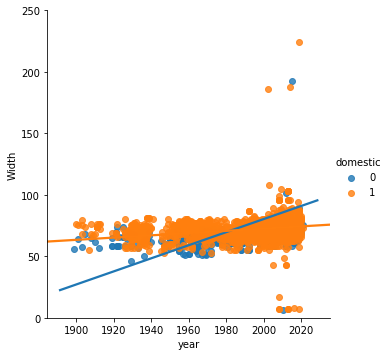

In [207]:
plt.figure(figsize = (10,6))
sns.lmplot('year', 'Width', data=df1, hue='domestic', ci=None)
plt.ylim(0,250)

In [7]:
df1 = pd.read_csv('autoevo')

In [164]:
df1 = df1.drop(axis=0, labels=[5033,5568,5992])

In [185]:

for wi, fi in enumerate(df1['Unladen Weight']):
    df1.loc[:,'Unladen Weight'].iloc[wi] = float(fi.split()[0])

#    print(type(fi))
# #     if type(fi) != int:
# #         try:
# #             fi = float(fi)
# #         except ValueError:
# #             print(wi, fi)
# #     else:
# #         pass

KeyError: 'Weight'

In [187]:
df1['Weight'] = ''
for wi, fi in enumerate(df1['Unladen Weight']):
    df1['Weight'].iloc[wi] = float(fi.split()[0])


AttributeError: 'float' object has no attribute 'split'

In [188]:
df1.head()

,Acceleration 0-62 Mph (0-100 kph),CO2 Emissions,Cargo Volume,City,Combined,Cylinders,Displacement,Drive Type,Front,Front/rear Track,...,Wheelbase,Width,manufacturer,model,year,origin,domestic,Acceleration,Max Speed,Weight
0,6.4,NaN,12.3,24 mpg US OR 9.8 L/100Km,28,L4,2354.0,Front Wheel Drive,Ventilated Discs,"59.4/60.2 in OR 1,509/1,529 mm",...,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2018 - Present,2018,AS,0,6.4,138.0,3093
1,6.4,NaN,12.3,25 mpg US OR 9.4 L/100Km,29,L4,2354.0,Front Wheel Drive,Ventilated Discs,"59.4/60.2 in OR 1,509/1,529 mm",...,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2016 - 2018,2016,AS,0,6.4,138.0,3093
2,6.4,NaN,12.3,22 mpg US OR 10.7 L/100Km,25,L4,2354.0,Front Wheel Drive,Ventilated discs,"59.4/60.3 in OR 1,509/1,532 mm",...,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2014 - 2016,2014,AS,0,6.4,138.0,2954
3,6.4,ULEV-2 / AT-PZEV,9.99,39 mpg US OR 6 L/100Km,38,4 inline,1496.0,Front Wheel Drive,Ventilated Discs,"59.4/60.3 in OR 1,509/1,532 mm",...,105.1 in OR 2670 mm,70.6,ACURA,ACURA ILX 2012 - Present,2012,AS,0,6.4,138.0,2959
4,6.4,NaN,9.99,NaN,NaN,L4,1998.0,All Wheel Drive,Ventilated Discs,"59.4/60.3 in OR 1,509/1,532 mm",...,105.1 in OR 2670 mm,70.6,ACURA,ACURA RDX 2018 - Present,2018,AS,0,6.4,138.0,2959


In [176]:
df1.corr()

,Acceleration 0-62 Mph (0-100 kph),Displacement,year,domestic,Acceleration,Max Speed
Acceleration 0-62 Mph (0-100 kph),1.000000,-0.235387,-0.401934,0.000865,1.000000,0.122471
Displacement,-0.235387,1.000000,-0.061707,0.214720,-0.235387,-0.100228
year,-0.401934,-0.061707,1.000000,-0.075916,-0.401934,0.132893
domestic,0.000865,0.214720,-0.075916,1.000000,0.000865,-0.021040
Acceleration,1.000000,-0.235387,-0.401934,0.000865,1.000000,0.122471
Max Speed,0.122471,-0.100228,0.132893,-0.021040,0.122471,1.000000


In [184]:
df1['Unladen Weight'].unique()

array(['3093 lbs OR 1403 kg', '2954 lbs OR 1340 kg',
       '2959 lbs OR 1342 kg', ..., '2167 lbs OR 983 kg',
       '1874.3 lbs OR 850 kg', '3721 lbs OR 1688 kg'], dtype=object)

In [182]:
df1[df1['Combined'] == 'Infinity mpg US OR 0 L/100Km']

,Acceleration 0-62 Mph (0-100 kph),CO2 Emissions,Cargo Volume,City,Combined,Cylinders,Displacement,Drive Type,Front,Front/rear Track,...,Unladen Weight,Wheelbase,Width,manufacturer,model,year,origin,domestic,Acceleration,Max Speed


In [118]:
df1 = df1.drop(labels=[1816])

In [189]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6156 entries, 0 to 6167
Data columns (total 32 columns):
Acceleration 0-62 Mph (0-100 kph)    6086 non-null float64
CO2 Emissions                        4139 non-null object
Cargo Volume                         6121 non-null object
City                                 4386 non-null object
Combined                             5058 non-null object
Cylinders                            6123 non-null object
Displacement                         6115 non-null float64
Drive Type                           6123 non-null object
Front                                6124 non-null object
Front/rear Track                     6117 non-null object
Fuel                                 6124 non-null object
Fuel System                          6124 non-null object
Gearbox                              6122 non-null object
Gross Weight Limit                   6087 non-null object
Ground Clearance                     6094 non-null object
Height               

In [304]:
pip install selenium


     |████████████████████████████████| 911kB 1.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [160]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


url = 'https://www.cars.com{}'.format(get_specs[0])
browser = webdriver.Chrome(executable_path = '/Users/charleneawillis/Downloads/chromedriver')
browser.get(url)


AttributeError: 'WebDriver' object has no attribute 'implicity_wait'

In [162]:
specs_button = browser.find_elements_by_xpath("//*[@id='accordion']")


ElementClickInterceptedException: Message: element click intercepted: Element <button id="accordion" class="specs-accordion " data-linkname="expand-specs" data-customlink="click">...</button> is not clickable at point (599, 677). Other element would receive the click: <td class="specs-accordion-description">...</td>
  (Session info: chrome=79.0.3945.79)


In [4]:
browser = webdriver.Chrome(executable_path = '/Users/charleneawillis/Downloads/chromedriver')

browser.get('https://www.cars.com{}'.format(get_specs[0]))

NameError: name 'get_specs' is not defined

In [159]:
browser = webdriver.Chrome(executable_path = '/Users/charleneawillis/Downloads/chromedriver')

browser.get('https://www.cars.com{}'.format(get_specs[50]))

In [165]:
specs_button = browser.find_elements_by_xpath("//*[@id='accordion']")
specs_button[-2].click()

elements = BeautifulSoup(browser.page_source, 'html.parser')
stuffs = elements.find_all('div', attrs={'class': 'specs-accordion-body'})

# pag1 = requests.get(get_specs[50])
# sou1 = BeautifulSoup(browser.page_source, 'html.parser')
# sou1.find_all(class_=)

In [182]:
stuff = elements.find_all(class_='specs-accordion-description')

In [183]:
stuff

[<td class="specs-accordion-description">Remote activated perimeter/approach lights</td>,
 <td class="specs-accordion-description">Knee airbag</td>,
 <td class="specs-accordion-description">Manual adjustable front head restraints</td>,
 <td class="specs-accordion-description">Dual front impact airbags</td>,
 <td class="specs-accordion-description">Remote keyless entry</td>,
 <td class="specs-accordion-description">Side-impact bars</td>,
 <td class="specs-accordion-description">Seat-mounted driver and passenger side-impact airbags</td>,
 <td class="specs-accordion-description">Rear side-impact airbag</td>,
 <td class="specs-accordion-description">Electronic stability</td>,
 <td class="specs-accordion-description">Adjustable front head restraints</td>,
 <td class="specs-accordion-description">Forward collision</td>,
 <td class="specs-accordion-description">Compact spare tire</td>,
 <td class="specs-accordion-description">Height adjustable front seatbelts</td>,
 <td class="specs-accordion

In [170]:
stuffs[0]

<div class="specs-accordion-body">
<table class="data-list" id="specs-accordion-table">
<tbody>
<tr>
<td class="specs-accordion-description">Remote activated perimeter/approach lights</td>
<td class="data"><span class="legend-icon optional-icon">O</span></td>
</tr>
<tr>
<td class="specs-accordion-description">Knee airbag</td>
<td class="data"><span class="legend-icon standard-icon">S</span></td>
</tr>
<tr>
<td class="specs-accordion-description">Manual adjustable front head restraints</td>
<td class="data"><span class="legend-icon standard-icon">S</span></td>
</tr>
<tr>
<td class="specs-accordion-description">Dual front impact airbags</td>
<td class="data"><span class="legend-icon standard-icon">S</span></td>
</tr>
<tr>
<td class="specs-accordion-description">Remote keyless entry</td>
<td class="data"><span class="legend-icon standard-icon">S</span></td>
</tr>
<tr>
<td class="specs-accordion-description">Side-impact bars</td>
<td class="data"><span class="legend-icon standard-icon">S</

In [202]:
browser.close()